# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [1]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [2]:
# 3 digits merge on year and country
merge_share_ewcs("3digits_year_country.csv", convert_to_3_digits=True)
# 3 digits on year only
merge_share_ewcs("3digits_year.csv", convert_to_3_digits=True, not_country_wise=True)
# 4 digits merge on year and country
merge_share_ewcs("4digits_year_country.csv", convert_to_3_digits=False)
# 4 digits on year only
merge_share_ewcs("4digits_year.csv", convert_to_3_digits=False, not_country_wise=True)

In [3]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_year_country : 1488 unique ids
4digits_year_country : 1011 unique ids
3digits_year : 2225 unique ids
4digits_year : 2149 unique ids


In [5]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_year.csv"
)

In [22]:
df.job_status = df.job_status.replace(
    {"Employee": "Private sector employee", "Civil servant": "Public sector employee"}
)
dummy_df = pd.get_dummies(df["job_status"], prefix="Category").astype(int)
dummy_df.describe()

,Category_Private sector employee,Category_Public sector employee,Category_Self-employed
count,4298.000000,4298.000000,4298.000000
mean,0.627966,0.257794,0.114239
std,0.483404,0.437471,0.318139
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [42]:
round(df.groupby("year").jqi_sum_pure.describe(), 2)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,2149.0,428.22,33.24,326.98,405.57,433.15,454.60,544.65
2015,2149.0,417.21,35.62,203.54,393.04,423.13,441.79,522.90


Number of unique IDs: 2226
Number of unique IDs by country:
country
Austria           148
Belgium           276
Czech Republic    166
Denmark           176
Estonia           408
France            215
Germany            31
Italy             130
Slovenia          108
Spain             129
Sweden             78
Switzerland       361
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    2206
2015    2169
Name: mergeid, dtype: int64

Demographics:
           age   gender  nb_children  yrseducation
count  4375.00  4375.00      4375.00       4375.00
mean     56.07     0.56         1.86         12.24
std       3.18     0.50         1.35          4.74
min      50.00     0.00         0.00          0.00
25%      54.00     0.00         1.00         10.00
50%      56.00     1.00         2.00         12.00
75%      58.00     1.00         3.00         15.00
max      66.00     1.00        17.00         36.00


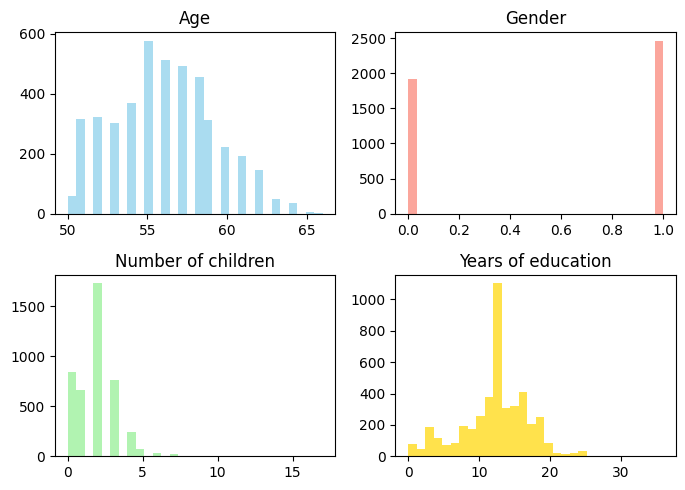


Job Status:
job_status
Employee                   0.37
Private sector employee    0.26
Public sector employee     0.18
Self-employed              0.12
Civil servant              0.07
Name: proportion, dtype: float64

Industry of Employment:
industry
Health and social work                          0.14
Other community                                 0.13
Education                                       0.13
Manufacturing                                   0.11
Wholesale and retail trade                      0.10
Public administration and defence               0.10
Construction                                    0.06
Transport, storage and communication            0.05
Agriculture, hunting, forestry, fishing         0.05
Financial intermediation                        0.03
Hotels and restaurants                          0.03
Real estate, renting and business activities    0.02
Electricity, gas and water supply               0.02
Other                                           0.01
Mining 

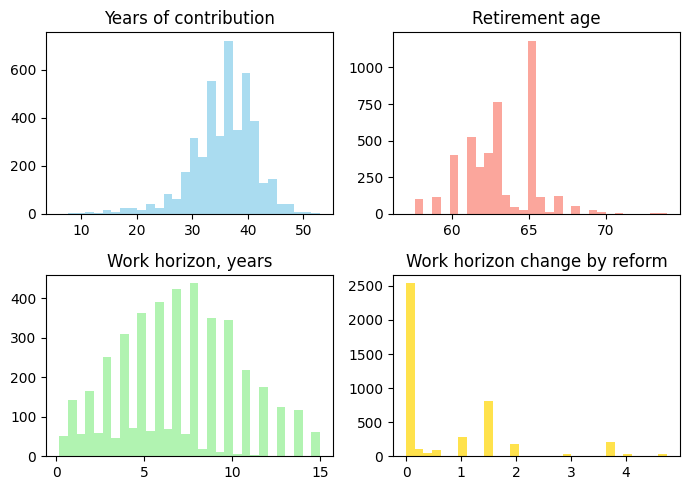


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.39
1       0           0.35
0       1           0.21
1       1           0.05
0       Refusal     0.00
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     1117
1.0     1021
2.0      846
3.0      562
4.0      391
5.0      223
6.0      111
7.0       60
8.0       21
9.0       15
10.0       6
12.0       2
Name: count, dtype: int64


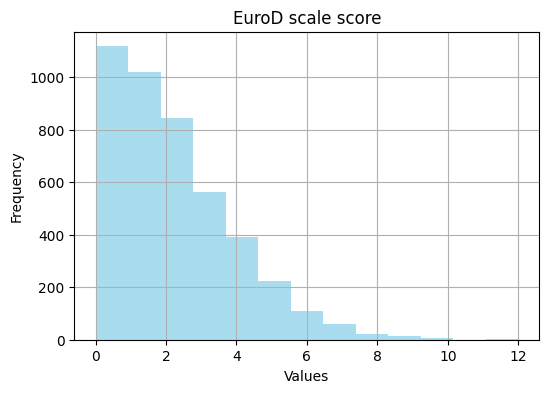


Working Conditions:
       jqi_monthly_earnings_pure  jqi_skills_discretion_pure  \
count                    4375.00                     4375.00   
mean                     1594.83                       60.01   
std                       504.80                       13.80   
min                       307.61                        5.41   
25%                      1260.74                       49.16   
50%                      1520.24                       60.16   
75%                      1859.62                       71.25   
max                      6766.63                       91.23   

       jqi_social_environment_pure  jqi_physical_environment_pure  \
count                      4375.00                        4375.00   
mean                         80.56                          84.24   
std                           5.12                           8.56   
min                          40.91                          30.77   
25%                          78.41                       

In [9]:
describe_data(df)

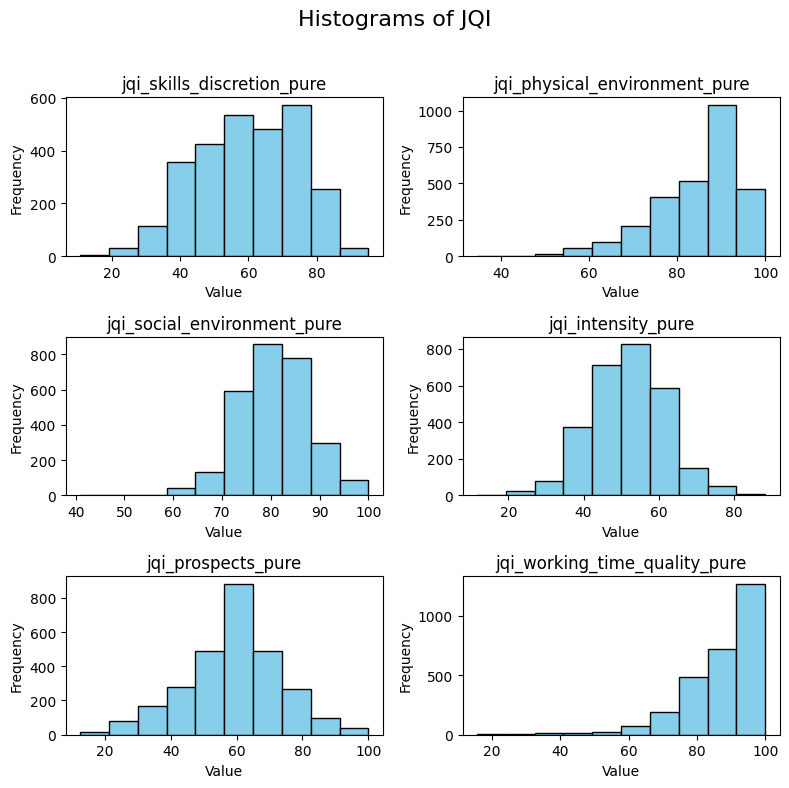

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle("Histograms of JQI", fontsize=16)

axes = axes.flatten()

for i, column in enumerate(
    df[
        [
            "jqi_skills_discretion_pure",
            "jqi_physical_environment_pure",
            "jqi_social_environment_pure",
            "jqi_intensity_pure",
            "jqi_prospects_pure",
            "jqi_working_time_quality_pure",
        ]
    ].columns
):
    axes[i].hist(df[column], bins=10, color="skyblue", edgecolor="black")
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()